### Practice Exam Problem 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
%matplotlib inline

a, b, c, d, x, y, r = symbols('a b c d x y r')

### Problem 
Consider the following predator-prey model, with $x$ being the population size of prey and $y$ of predators (such that $x \geq 0$ $y \geq 0$) and $a$, $b$, $c$ and $d$ are positive parameters.

$\frac{dx}{dt} = ax - bxy$

$\frac{dy}{dt} = -cy + dxy$

Please answer the following questions:
1. Explain what each term on the right hand sides represents.
2. Find the equilibrium points.
3. Calculate the Jacobian matrix of the model.
4. Conduct linear stability analysis for each of the equilibrium points, and discuss the conditions (regarding the parameter values of a, b, c and d) under which they are stable/unstable.
5. Identify the parameter setting at which a bifurcation occurs.

---

As defined, $\frac{dx}{dt}$ represents the change in the population of prey as a function of time. In this model, the quantity $\frac{dx}{dt}$ can be computed by the population of the prey (i.e., $x$) _less_ the amount that the prey gets consumed by the predators (i.e., $y$). The constant $b$ represents the predator-prey interaction rate, and the constant $a$ is proportional to the amount of prey in the population.

As defined, $\frac{dy}{dt}$ represents the change in the population of the predators in the population as a function of time. In this model, the quantity $\frac{dy}{dt}$ can be computed by the _decrease_ in the population of the predators, $y$, possibly due to attrition as well as the amount of predators, $y$, that can interact with the prey, $x$. The constant $c$ represents the rate that the predators are loss, and the constant $d$ is proportional to the amount of predator-prey interaction in the population.

In [2]:
Xdot = a * x - b * y * x
Ydot = -c * y + d * y * x

In [3]:
# Find eq. points. 
solve([Xdot, Ydot], (x, y))

In [4]:
# Calculate Jacobian matrix of the model.
J = Matrix([[Xdot.diff(x), Xdot.diff(y)], 
            [Ydot.diff(x), Ydot.diff(y)]])
J

⎡a - b⋅y    -b⋅x  ⎤
⎢                 ⎥
⎣  d⋅y    -c + d⋅x⎦

In [5]:
# Conduct stability analysis around the eq. point 1.
J_eq_1 = J.subs([(x, 0), (y, 0)])
J_eq_1

⎡a  0 ⎤
⎢     ⎥
⎣0  -c⎦

In [6]:
J_eq_1.eigenvals()

In [7]:
A = np.array([[1, 2, 4], 
              [9, 1, 9], 
              [0, 0, 6]])
np.linalg.eig(A)

(array([ 5.24264069, -3.24264069,  6.        ]),
 array([[ 0.42640143, -0.42640143,  0.42342626],
        [ 0.90453403,  0.90453403,  0.90256649],
        [ 0.        ,  0.        ,  0.07799957]]))

In [8]:
J_eq_vals_1 = J_eq_1.eigenvects()
J_eq_vals_1

⎡⎛      ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡0⎤⎤⎞⎤
⎢⎜a, 1, ⎢⎢ ⎥⎥⎟, ⎜-c, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠  ⎝       ⎣⎣1⎦⎦⎠⎦

In [9]:
# Conduct stability analysis around the eq. point 2.
J_eq_2 = J.subs([(x, c/d), (y, a/b)])
J_eq_2

⎡     -b⋅c ⎤
⎢ 0   ─────⎥
⎢       d  ⎥
⎢          ⎥
⎢a⋅d       ⎥
⎢───    0  ⎥
⎣ b        ⎦

In [10]:
J_eq_vals_2 = J_eq_2.eigenvects()
J_eq_vals_2

⎡⎛              ⎡⎡   b⋅c    ⎤⎤⎞  ⎛             ⎡⎡  -b⋅c    ⎤⎤⎞⎤
⎢⎜              ⎢⎢──────────⎥⎥⎟  ⎜             ⎢⎢──────────⎥⎥⎟⎥
⎢⎜   ______     ⎢⎢    ______⎥⎥⎟  ⎜  ______     ⎢⎢    ______⎥⎥⎟⎥
⎢⎜-╲╱ -a⋅c , 1, ⎢⎢d⋅╲╱ -a⋅c ⎥⎥⎟, ⎜╲╱ -a⋅c , 1, ⎢⎢d⋅╲╱ -a⋅c ⎥⎥⎟⎥
⎢⎜              ⎢⎢          ⎥⎥⎟  ⎜             ⎢⎢          ⎥⎥⎟⎥
⎣⎝              ⎣⎣    1     ⎦⎦⎠  ⎝             ⎣⎣    1     ⎦⎦⎠⎦

In [11]:
# Re(lambda) > 0 => unstable (cont.) Pg. 122
# abs(lambda) > 1 => unstable (discrete) Pg. 85
# March 2 lecture at 40:00 (discussion about this)

# a > 0, this point is unstable. 
# -c > 0 , this point is unstable.
# At this point (0, 0) is unstable. 

# -c > 0 (find the values c that make this expression true)
# c < 0 (for values of c that are < 0, the point is unstable.)

# a: always unstable, c: always stable. => (0, 0) point is unstable. (look this up)
# If you have a mixture of unstable and stable, the system is unstable. 

# Feb 25, 2021 at 29:00 


# - sqrt(-ac) > 0 (find the values of a, c that make this expression true)
# sqrt(-ac) < 0 => -ac < 0**2 => ac > 0 (since a, c > 0, this point is unstable.)
# 2 + 3i
# Re = 2, Im = 3

# -sqrt(-ac) = 0 + 1i

# Re = 0
# Im = i 

# x + 3i

# Re = x
 
#x > 0 (or find the conditions of x that make the expression true)

# 1) If you have a mixture of unstable and stable, is the overall model unstable. 
#. 2) For the statement, "no real components" are you saying that -sqrt(-ac) = i?
# That is, 0 + i where i = sqrt(-ac).

### Linear Stability Analysis

For this model, there were two equlibirum points, $(0, 0)$ and $(\frac{c}{d}, \frac{a}{b})$. For the eq. point $(0, 0)$ the model will be **unstable** if the constant $a > 0$ and/or, if the constant, $c < 0$. Given the fact that the parameters, $a, b, c, d > 0$, that is, positive, the model will always be unstable at the point $(0, 0)$. 


On the other hand, the model will be unstable at the equlibirum point, $(\frac{c}{d}, \frac{a}{b})$ if the product, $ac < 0$. Given the fact that $a, b, c, d > 0$, that is, positive, the quantity $ac$ will always be positive and therefore, the model will be **unstable** at the point $(\frac{c}{d}, \frac{a}{b})$.

In [12]:
def model(aconst, bconst, cconst, dconst, dt, t_not, X_not, Y_not, tdomain):

    t_results = [t_not]
    X_results = [X_not]
    Y_results = [Y_not]

    while t_results[-1] <= tdomain:

        Xdot = (aconst * X_results[-1]) - (bconst * X_results[-1] * Y_results[-1])
        Ydot = (-1 * cconst * Y_results[-1]) + (dconst * X_results[-1] * Y_results[-1])
        nx = X_results[-1]  + Xdot * dt
        ny = Y_results[-1]  + Ydot * dt
        time = t_results[-1] + dt

        t_results.append(time) 
        X_results.append(nx) 
        Y_results.append(ny) 

    results = {}
    results['time'] = t_results
    results['x'] = X_results
    results['y'] = Y_results
    
    return results

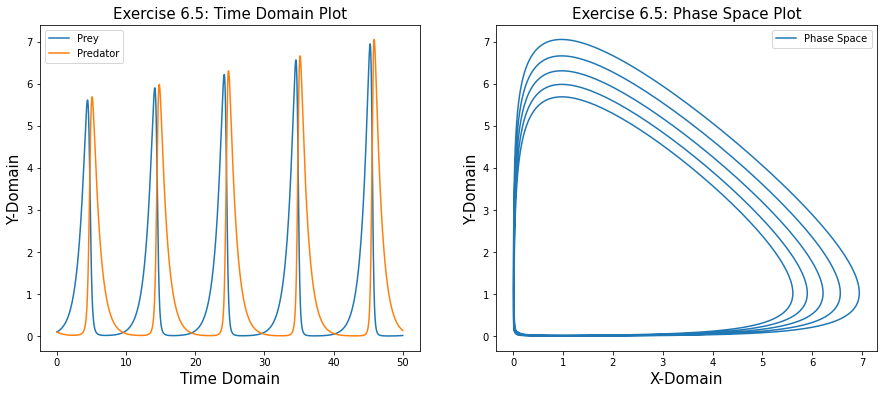

In [13]:
plt.figure(figsize=(15, 6))
run = model(aconst=1, bconst=1, cconst=1, dconst=1, dt=0.01, t_not=0, X_not=0.1, Y_not=0.1, tdomain=50)
plt.subplot(1, 2, 1)
plt.plot(run['time'], run['x'], label='Prey')
plt.plot(run['time'], run['y'], label='Predator')
plt.xlabel('Time Domain', fontsize=15)
plt.ylabel('Y-Domain', fontsize=15)
plt.title('Exercise 6.5: Time Domain Plot', fontsize=15)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(run['x'], run['y'], label='Phase Space')
plt.xlabel('X-Domain', fontsize=15)
plt.ylabel('Y-Domain', fontsize=15)
plt.title('Exercise 6.5: Phase Space Plot', fontsize=15)
plt.legend()
plt.show()